Files already downloaded and verified


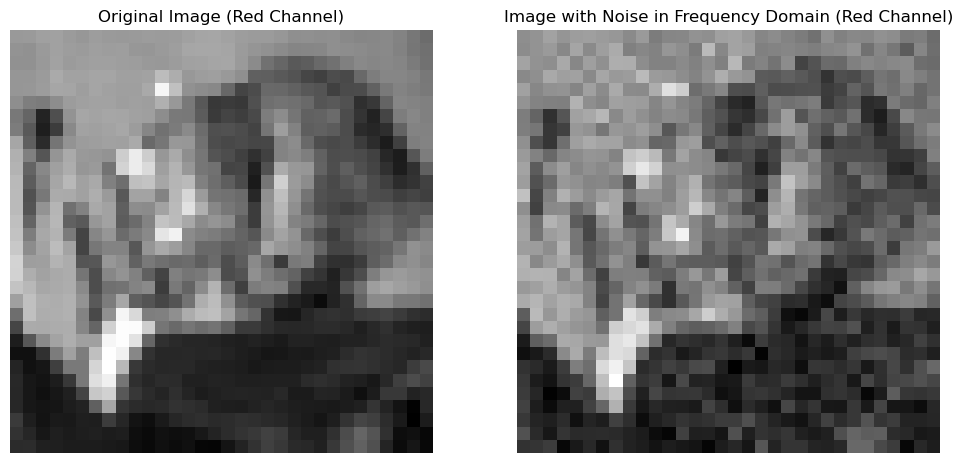

[[ 0.00927501 -0.00717133 -0.04764849 ...  0.01092677 -0.04764844
  -0.00717136]
 [-0.00329559 -0.04024017 -0.03621658 ...  0.14075693 -0.08487408
  -0.00445308]
 [-0.10513348 -0.0342281   0.01236106 ... -0.05255221  0.03806923
   0.01162104]
 ...
 [ 0.02212985  0.00747826 -0.00904152 ... -0.00133525 -0.09872778
  -0.00462616]
 [-0.10513343  0.011621    0.0380693  ... -0.06916436  0.01236102
  -0.03422818]
 [-0.00329555 -0.0044531  -0.08487412 ...  0.0669694  -0.03621665
  -0.04024026]]


In [89]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

# 加载 CIFAR-10 数据集
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data/cifar10', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False)

# 从数据集中获取单个图像及其标签
dataiter = iter(trainloader)
images, labels = dataiter.next()
image = images[0]  # 取出批次中的第一个图像

# img_mpig = mpig.imread("./1gpwe.jpg")
# print("img_mpig :",img_mpig .shape)

# image = img_mpig.transpose((2,0,1))

# 选择图像的一个颜色通道进行处理，这里我们使用红色通道
image_red_channel = image[0].numpy()

# 计算图像的二维傅里叶变换
f_transform = fft2(image_red_channel)

# 将零频分量移动到频谱中心
f_shifted = fftshift(f_transform)

# 在频域中添加噪声
noise_level = 10  # 噪声水平
noise = (np.random.rand(*image_red_channel.shape) - 0.5) * noise_level
f_noisy = f_shifted + noise

# 将零频分量移回原位并进行逆傅里叶变换
f_ishifted = ifftshift(f_noisy)
img_back = ifft2(f_ishifted)

# 取实部
img_back = np.real(img_back)

# 显示原始和扰动后的图像（红色通道）
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_red_channel, cmap='gray')
plt.title('Original Image (Red Channel)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Image with Noise in Frequency Domain (Red Channel)')
plt.axis('off')

plt.show()

print(image_red_channel-img_back)


Files already downloaded and verified


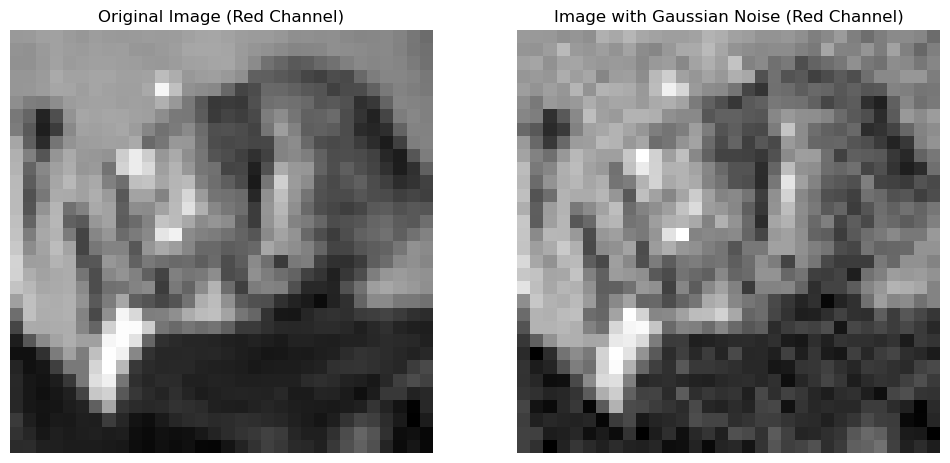

In [90]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# 加载 CIFAR-10 数据集
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data/cifar10', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False)

# 从数据集中获取单个图像及其标签
dataiter = iter(trainloader)
images, labels = dataiter.next()
image = images[0]  # 取出批次中的第一个图像

# 选择图像的一个颜色通道（红色）进行处理
image_red_channel = image[0].numpy()

# 生成高斯噪声并添加到红色通道
mean = 0
stddev = 0.05
gaussian_noise = np.random.normal(mean, stddev, image_red_channel.shape)
image_red_channel_noisy = image_red_channel + gaussian_noise
image_red_channel_noisy = np.clip(image_red_channel_noisy, 0, 1)  # 限制像素值在合理范围内

# 显示原始和加噪后的图像（红色通道）
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_red_channel, cmap='gray')
plt.title('Original Image (Red Channel)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_red_channel_noisy, cmap='gray')
plt.title('Image with Gaussian Noise (Red Channel)')
plt.axis('off')

plt.show()


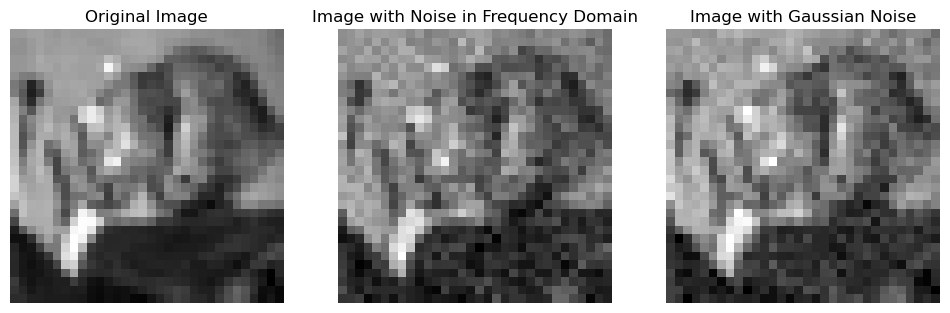

In [91]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_red_channel, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_back, cmap='gray')
plt.title('Image with Noise in Frequency Domain')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_red_channel_noisy, cmap='gray')
plt.title('Image with Gaussian Noise')
plt.axis('off')

plt.show()

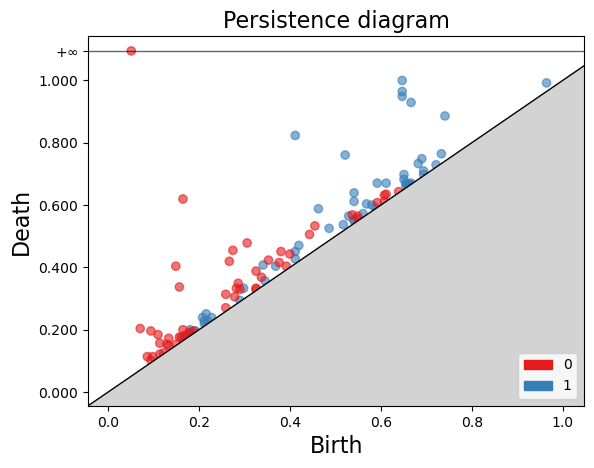

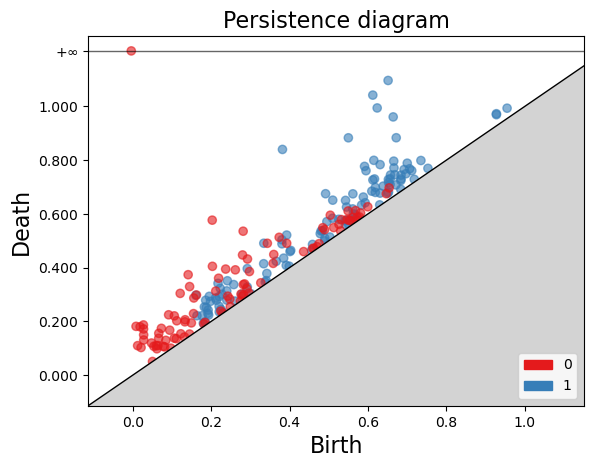

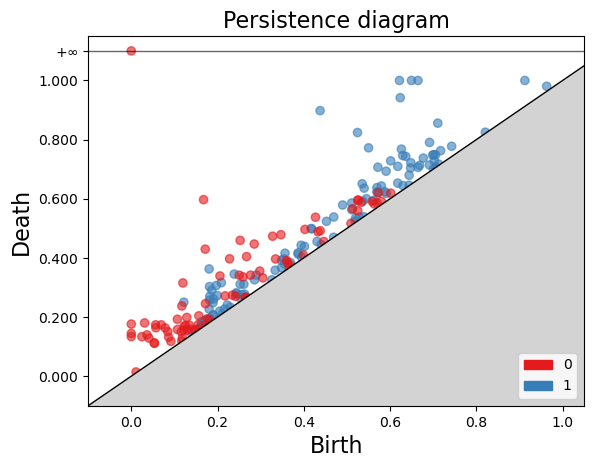

In [92]:
import gudhi as gd

cubical_complex = gd.CubicalComplex(top_dimensional_cells=image_red_channel)
persistence = cubical_complex.persistence()
gd.plot_persistence_diagram(persistence)
cubical_complex = gd.CubicalComplex(top_dimensional_cells=img_back)
persistence = cubical_complex.persistence()
gd.plot_persistence_diagram(persistence)
cubical_complex = gd.CubicalComplex(top_dimensional_cells=image_red_channel_noisy)
persistence = cubical_complex.persistence()
gd.plot_persistence_diagram(persistence)

In [93]:
from ripser import ripser
from persim import plot_diagrams
from persim import bottleneck, sliced_wasserstein

In [94]:
diagrams1 = ripser(image_red_channel)['dgms']
diagrams2 = ripser(img_back)['dgms']
diagrams3 = ripser(image_red_channel_noisy)['dgms']
wd1 = sliced_wasserstein(diagrams1[1], diagrams2[1])
wd2 = sliced_wasserstein(diagrams1[1], diagrams3[1])
print(f"Wasserstein Distance: {wd1},{wd2}")

Wasserstein Distance: 0.29638163179863714,0.2575592898628122


/opt/conda/envs/torch/lib/python3.8/site-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/opt/conda/envs/torch/lib/python3.8/site-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
/opt/conda/envs/torch/lib/python3.8/site-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


In [95]:
cosd1 = np.dot(image_red_channel.flatten(), img_back.flatten()) / (np.linalg.norm(image_red_channel.flatten()) * np.linalg.norm(img_back.flatten()))
cosd2 = np.dot(image_red_channel.flatten(), image_red_channel_noisy.flatten()) / (np.linalg.norm(image_red_channel.flatten()) * np.linalg.norm(image_red_channel_noisy.flatten()))
print(f"Cosine Similarity Distance: {1-cosd1},{1-cosd2}")

Cosine Similarity Distance: 0.008975675141631112,0.005569395725140702
